<a href="https://colab.research.google.com/github/Fatai-soliu/CNN-for-Binary-Image-Classification/blob/main/CNN_for_Binary_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -vvv tensorflow

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-build-tracker-gwso9dba
Initialized build tracking at /tmp/pip-build-tracker-gwso9dba
Created build tracker: /tmp/pip-build-tracker-gwso9dba
Entered build tracker: /tmp/pip-build-tracker-gwso9dba
Created temporary directory: /tmp/pip-install-eefosaqy
Created temporary directory: /tmp/pip-ephem-wheel-cache-vmfpx31l
Created temporary directory: /tmp/pip-unpack-hi98kur3
Removed build tracker: '/tmp/pip-build-tracker-gwso9dba'


## Importing the dataset from Kaggle to Colab

In [2]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Install Kaggle API

! pip install -q kaggle

In [5]:
# Create a directory as kaggle

! mkdir -p ~/ .kaggle

In [6]:
# Import API key to google colab

from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
#  copy API key to kaggle directory

! cp kaggle.json ~/ .kaggle/

cp: -r not specified; omitting directory '/root/'


In [8]:
# disable API key

! chmod 600 /root/ .kaggle/kaggle.json

In [9]:
# List all datasets available in kaggle

! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [10]:
# Importing cat and dog dataset

! kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 95% 207M/218M [00:01<00:00, 151MB/s]
100% 218M/218M [00:01<00:00, 119MB/s]


In [11]:
# unzipping the dataset

! unzip -q /content/cat-and-dog.zip

## Building the Model

In [12]:
 # Creating an object (initializing CNN)

 model = tf.keras.models.Sequential()


In [13]:
# Adding first CNN layer (input layer)

# 1) filters = 64
# 2) kenel size = 3
# 3) padding = same
# 4) activation = relu
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation = 'relu', input_shape = (32, 32, 3)))

In [14]:
# adding second CNN layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [15]:
# Adding Flattening layer (converts array to a single vector)

model.add(tf.keras.layers.Flatten())

In [16]:
# Adding the dropout layer (regularization technique: prevents model from learning too much from the training data)

model.add(tf.keras.layers.Dropout(0.4))

In [17]:
# Adding fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [18]:
# Adding output layer

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
# Before training, need to compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fitting CNN to Images

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [22]:
# rescale images

datagen = ImageDataGenerator(rescale=1./255)

In [23]:
# rescale images in training and test set

training_set = datagen.flow_from_directory(directory = training_data_dir, target_size=(32, 32), classes=['dogs','cats'],
                                           class_mode = 'binary', batch_size= 20)

test_set = datagen.flow_from_directory(directory = test_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                       class_mode = 'binary', batch_size = 20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [24]:
len(training_set), len(test_set)

(401, 102)

In [25]:
len(training_set) * 20, len(test_set)*20

(8020, 2040)

In [26]:
test_set.batch_size

20

In [27]:
history  = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=101)

Epoch 1/20


<ipython-input-27-849d802c3a6f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history  = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=101)


401/401 [==============================] - 19s 34ms/step - loss: 0.6826 - accuracy: 0.5636 - val_loss: 0.6438 - val_accuracy: 0.6366
Epoch 2/20
401/401 [==============================] - 13s 33ms/step - loss: 0.6297 - accuracy: 0.6508 - val_loss: 0.6296 - val_accuracy: 0.6525
Epoch 3/20
401/401 [==============================] - 13s 33ms/step - loss: 0.5766 - accuracy: 0.6929 - val_loss: 0.6058 - val_accuracy: 0.6738
Epoch 4/20
401/401 [==============================] - 13s 33ms/step - loss: 0.5260 - accuracy: 0.7338 - val_loss: 0.5571 - val_accuracy: 0.7208
Epoch 5/20
401/401 [==============================] - 13s 32ms/step - loss: 0.4709 - accuracy: 0.7769 - val_loss: 0.6355 - val_accuracy: 0.6941
Epoch 6/20
401/401 [==============================] - 13s 33ms/step - loss: 0.4207 - accuracy: 0.8037 - val_loss: 0.5388 - val_accuracy: 0.7337
Epoch 7/20
401/401 [==============================] - 15s 38ms/step - loss: 0.3467 - accuracy: 0.8471 - val_loss: 0.5845 - val_accuracy: 0.7361
Epo

# Plotting the learning curve

In [28]:
#Define the function

def learning_curve(history, epoch):

  #training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

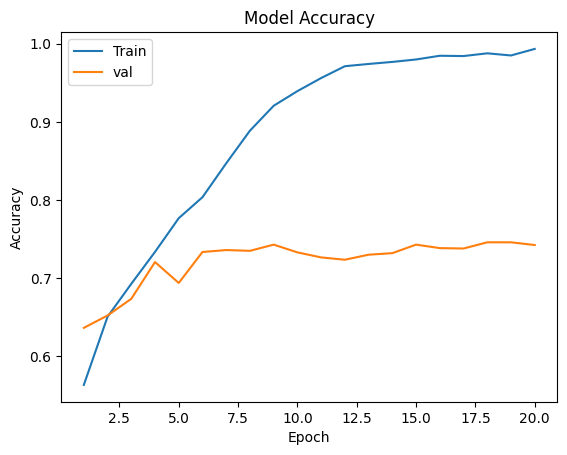

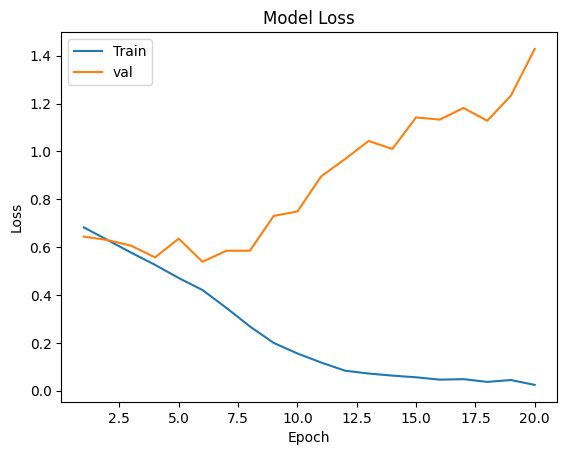

In [29]:
learning_curve(history, 20)

# Interpretation

Model Accuracy (Epoch vs Accuracy)
  1. The plot shows the variation between the training and validation accuracy
  2. After third epoch, our model is overfitted
  3.

  Model Loss (Epoch vs Loss)
  1. After the second epoch, training loss is decreasing but the validation loss is increasing
  2. This indicates that model is overfitting
  